<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [146]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pickle
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [147]:
df = pd.read_csv('df_model_eu.csv')

In [148]:
df = df.drop(['Unnamed: 0'], axis=1)

In [149]:
X = df.drop('salary_avg', axis=1)
y = df['salary_avg']

In [126]:
lm = LinearRegression() # start the model object
model = lm.fit(X,y) # fit your regression line / train the model
# lm.coef_ # lm.intercept_

In [127]:
predictions = lm.predict(X) # predict some values

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse, good to see if the errors are big, the values returnes are in the unit of the target
print("R2_score:", round(lm.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)

R2_score: 0.16
RMSE: 50254.251970385296


<AxesSubplot:xlabel='gender', ylabel='salary_avg'>

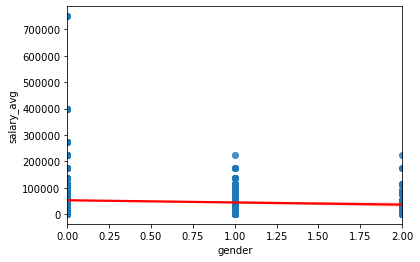

In [131]:
sns.regplot(X['gender'], y, line_kws={"color": "red"})

<AxesSubplot:xlabel='salary_avg'>

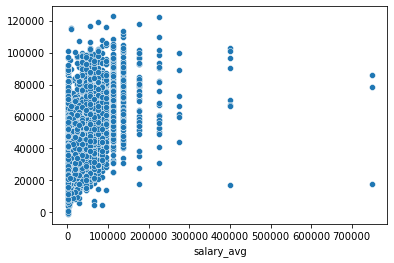

In [132]:
sns.scatterplot(y,predictions)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [151]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [152]:
predictions  = LR.predict(X_test)
predictions.shape

(441,)

In [153]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.17436167491774368, 64.19917030514267, 4121.533467868712)

In [154]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, n_jobs=1)

In [155]:
clf = RandomForestRegressor(random_state=None, max_features='sqrt', min_samples_leaf=2, 
                            min_samples_split=5, max_depth=30, n_estimators=200, bootstrap=True, 
                            min_impurity_split=None, min_weight_fraction_leaf=0.0,n_jobs=1,
                            verbose=0, warm_start=False)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.36036062011386716


In [162]:
# Use the forest's predict method on the test data
predictions = clf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 45.14 degrees.


In [163]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 35.36 %.


In [ ]:
'max_samples' : ['None', 0.5]

In [156]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [157]:
from sklearn.metrics import mean_squared_error
t= mean_squared_error(y_test, y_pred, squared=False)
print(t)

56.67467140918827


In [158]:
#MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
import math
RMSE = math.sqrt(t)
print(RMSE)

7.5282581922506


In [109]:
#Decision trees


model = DecisionTreeRegressor(random_state=0,max_depth = 3, max_features='sqrt',min_samples_leaf=1,min_samples_split=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.11123562771417728

In [110]:
#model1 = DecisionTreeRegressor(max_depth=None)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()

In [113]:
import numpy as np
model_pipeline = [model, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    score = cross_val_score(model, X_train, y_train, cv=10)
#     mean_score = cross_val_score(model, X_train, y_train, cv=10)
    scores[model_names[i]] = score
    i = i+1
print(scores)

{'Regression Tree': array([ 0.08288717,  0.09073124,  0.24216871,  0.16024182,  0.09013789,
       -0.23264261,  0.06452346,  0.09589382,  0.11330261,  0.07076198]), 'Linear Regression': array([0.14631972, 0.17578094, 0.13798328, 0.08252716, 0.19210649,
       0.17809426, 0.1862886 , 0.08868428, 0.28138679, 0.23870921]), 'KNN': array([ 0.08288717,  0.09073124,  0.24216871,  0.16024182,  0.09013789,
       -0.23264261,  0.06452346,  0.09589382,  0.11330261,  0.07076198])}


In [138]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [141]:
#With normalizer


transformer = Normalizer()
transformer.fit(X_train_num)


# saving in a pickle
with open('nm_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('nm_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_ = loaded_transformer.transform(X_train_num)
X_test_ = loaded_transformer.transform(X_test_num)

In [142]:
LR = LinearRegression()
LR.fit(X_train_,y_train)

LinearRegression()

In [144]:
predictions1  = LR.predict(X_test_)
predictions.shape

(503,)

In [145]:
r2_score(y_test, predictions1), mean_squared_error(y_test, predictions1, squared=False), mean_squared_error(y_test, predictions1)

(0.1344982188689654, 40641.633521530886, 1651742375.2984228)